* Zjistím, jaký dataset mám vypracovat

In [1]:
K = 4
L = len("Novotný")
M = ( (( K + L ) * 47 % 11) + 1 )
M

1

#### Import potřebných balíčků

In [2]:
import pyreadr # balíček na načtení dat
import pandas as pd # Práce s dataframe
import numpy as np # Vědecké výpočty
import matplotlib.pyplot as plt # Vizualizace
import matplotlib.gridspec as gridspec # Mřížka grafů
import matplotlib.ticker as ticker # Mřížka grafů
import seaborn as sns # Vizualizace
import scipy as sp # Statistika
import math # matematická knihovna
from numpy import random # náhodné hodnoty

# 1. Úkol

#### Načtení datového souboru

In [3]:
data = pyreadr.read_r('data.rda')
df = data["case0101"]

#### Rozdělení dat na 2 sledované skupiny

In [4]:
group1 = df[df["Treatment"] == "Intrinsic"]["Score"]
group2 = df[df["Treatment"] == "Extrinsic"]["Score"]

#### Stručný popis dat

* Dataset zkoumá dopad vnitřní a vnější motivace na kreativitu.

* Zkoumané subjekty s předpokládanou zkoušeností s kreativním psaním byly rozděleny náhodně do dvou skupin.

* U těchto subjektů se následně ohodnotily jejich výsledky.

#### Pro odhad statistik použiju výběrové odhady

In [5]:
# Průměr
def stredni_hodnota(column):
    return column.sum() / column.count()
#----------------------------------------------------------------#
# Výběrový rozptyl
def rozptyl(column):
    return sum((column[i] - stredni_hodnota(column))**2 for i in range(len(column))) / (column.count() - 1)
#----------------------------------------------------------------#
def median(column):
    if len(column) % 2 == 0:
        return (column.iloc[(len(column) // 2)] + column.iloc[(len(column) // 2) + 1]) / 2
    return column.iloc[(len(column) // 2)]
#----------------------------------------------------------------#

#### 1. skupina: Intrinsic

In [6]:
print("Střední hodnota:", stredni_hodnota(group1))
print("Rozptyl:", rozptyl(group1))
print("Medián:", median(group1))

Střední hodnota: 19.883333444595337
Rozptyl: 19.709276198788263
Medián: 20.550000190734863


#### 2. skupina: Extrinsic

In [7]:
print("Střední hodnota:", stredni_hodnota(group2))
print("Rozptyl:", rozptyl(group2))
print("Medián:", median(group2))

Střední hodnota: 15.739130642103111
Rozptyl: 27.589764529028617
Medián: 17.200000762939453


# Úkol 2

#### Histogram 1. skupiny

In [8]:
def my_histogram(column, name):
    plt.hist(column,bins=6)
    plt.xlabel("Skóre")
    plt.ylabel("Četnost")
    plt.title("Histogram skupiny " + name)
    plt.grid(False)

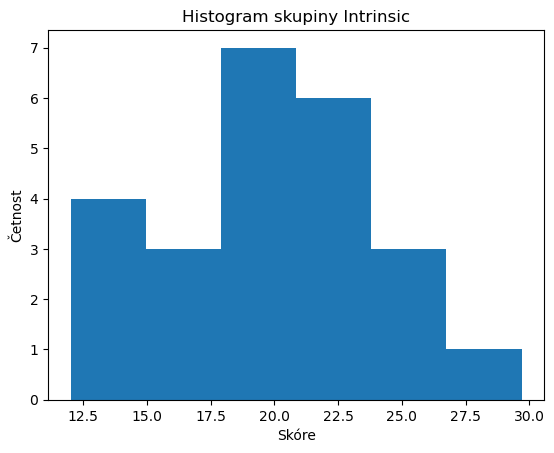

In [9]:
my_histogram(group1, "Intrinsic")

#### Histogram 2. skupiny

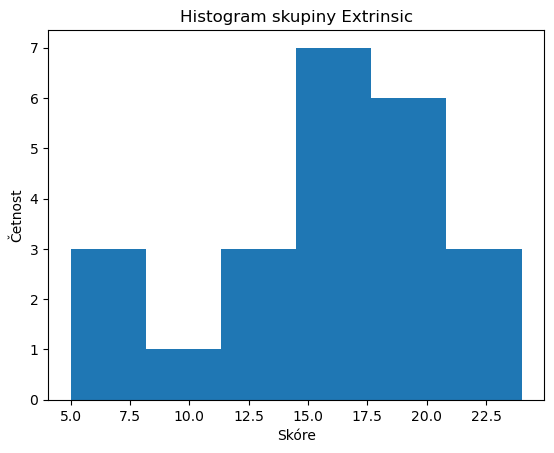

In [10]:
my_histogram(group2, "Extrinsic")

#### Empirické distribuční funkce obou skupin

In [11]:
def empiricka_funkce(df, name):
    plt.hist(df, label=name, histtype='step', cumulative=True)

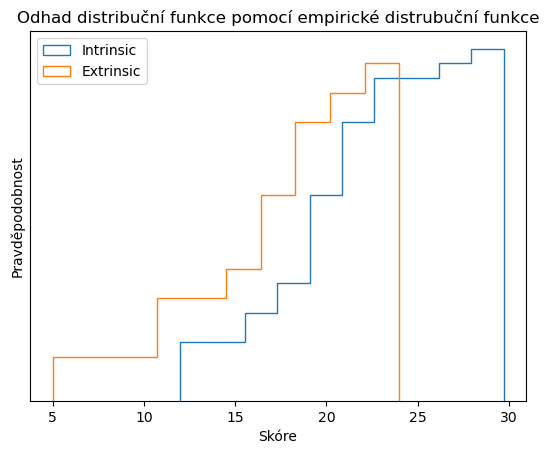

In [12]:
empiricka_funkce(group1, "Intrinsic")
empiricka_funkce(group2, "Extrinsic")
plt.title("Odhad distribuční funkce pomocí empirické distrubuční funkce")
plt.xlabel("Skóre")
plt.ylabel("Pravděpodobnost")
plt.legend(loc='upper left')
plt.yticks([],[])
plt.show()

# Úkol 3

#### Normální rozdělení

* Maximálně věrohodný odhad střední hodnoty normálního rozdělení je průměr

In [13]:
def prumer(data):
    return data.sum() / data.count()

* Maximálně věrohodný odhad rozptylu normálního rozdělení je z přednášky:

In [14]:
def MLE_rozptyl(data):
    return sum((data.iloc[i] - prumer(data)) ** 2 for i in range(len(data))) / data.count()

* Výsledky:

In [15]:
print("MLE střední hodnota Intrinsic:", prumer(group1))
print("MLE střední hodnota Extrinsic:", prumer(group2))

MLE střední hodnota Intrinsic: 19.883333444595337
MLE střední hodnota Extrinsic: 15.739130642103111


In [16]:
print("MLE rozptyl Intrinsic:", MLE_rozptyl(group1))
print("MLE rozptyl Extrinsic:", MLE_rozptyl(group2))

MLE rozptyl Intrinsic: 18.888056357172086
MLE rozptyl Extrinsic: 26.390209549505634


In [17]:
def normalni(x, stred, rozptyl):
    return (1 / math.sqrt(2 * np.pi * (rozptyl**2))) * (np.e ** (-((x - stred) ** 2) / (2 * (rozptyl ** 2))))

In [18]:
def graf_hustoty(column, name):
    fig = plt.figure(figsize=(13, 7))
    ax1 = plt.subplot(221)
    my_histogram(column, name)
    ax2 = plt.subplot(222)
    plt.plot([x for x in range(int(min(column)), int(max(column)))], [normalni(x, prumer(column), MLE_rozptyl(column)) for x in range(int(min(column)), int(max(column)))])   
    plt.xlabel("Skóre")
    plt.ylabel("Pravděpodobnost")
    plt.title("Hustota normálního rozdělení s odhadnutými parametry") 

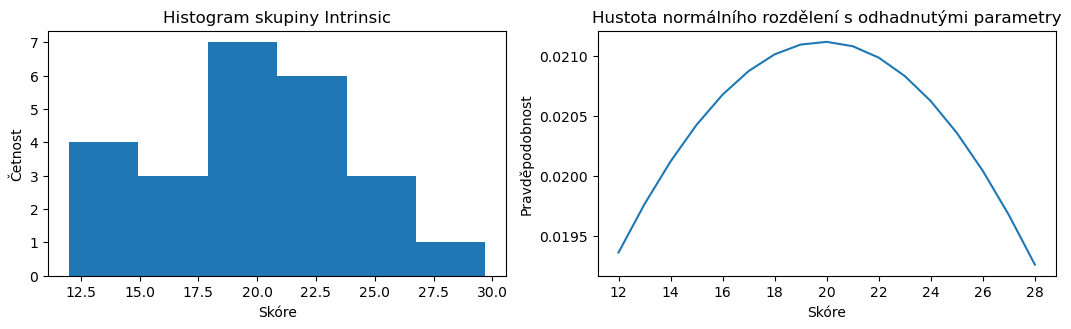

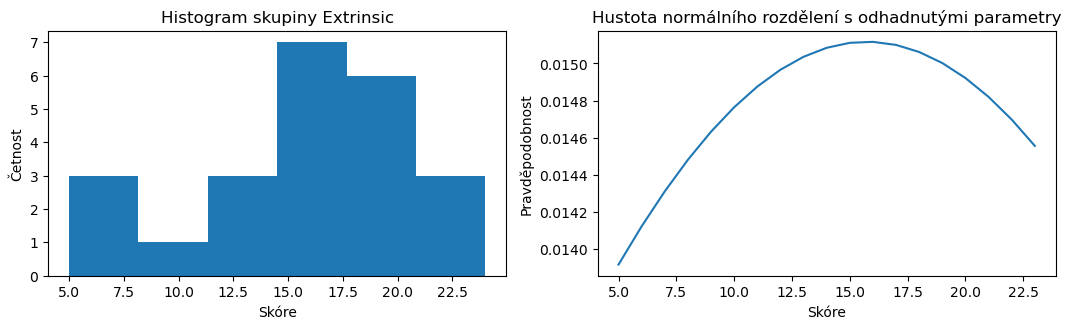

In [19]:
graf_hustoty(group1, "Intrinsic")
graf_hustoty(group2, "Extrinsic")

#### Exponenciální rozdělení

* Z přednášky vím, že metoda maximálně věrohodného odhadu odhaduje parametr exponenciálního rozdělení hodnotou:

In [20]:
def MLE_exp(data):
    return 1 / prumer(data)

* Výsledky:

In [21]:
print("MLE parametr Exp Intrinsic:", MLE_exp(group1))
print("MLE parametr Exp Extrinsic:", MLE_exp(group2))

MLE parametr Exp Intrinsic: 0.05029337775712949
MLE parametr Exp Extrinsic: 0.06353591076529605


In [22]:
def exponencialni(x, alpha):
    return alpha * (np.e ** (- alpha * x))

In [23]:
def graf_hustoty(column, name):
    fig = plt.figure(figsize=(13, 7))
    ax1 = plt.subplot(221)
    my_histogram(column, name)
    ax2 = plt.subplot(222)
    plt.plot([x for x in range(int(min(column)), int(max(column)))], [exponencialni(x, MLE_exp(column)) for x in range(int(min(column)), int(max(column)))])   
    plt.xlabel("Skóre")
    plt.ylabel("Pravděpodobnost")
    plt.title("Hustota exponenciálního rozdělení s odhadnutým parametrem") 

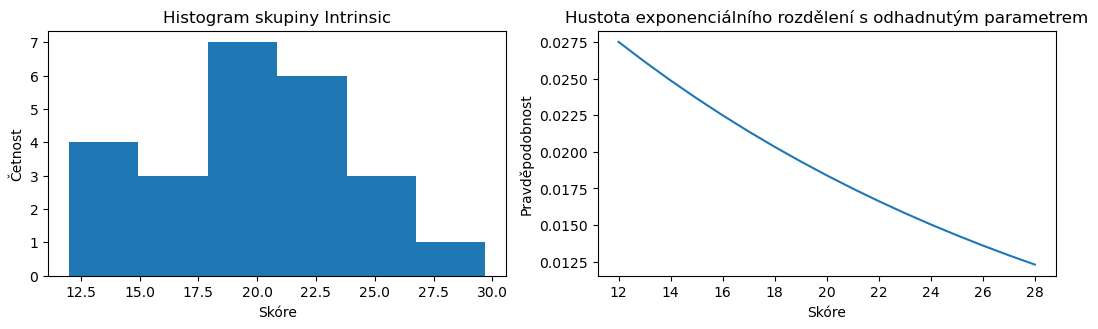

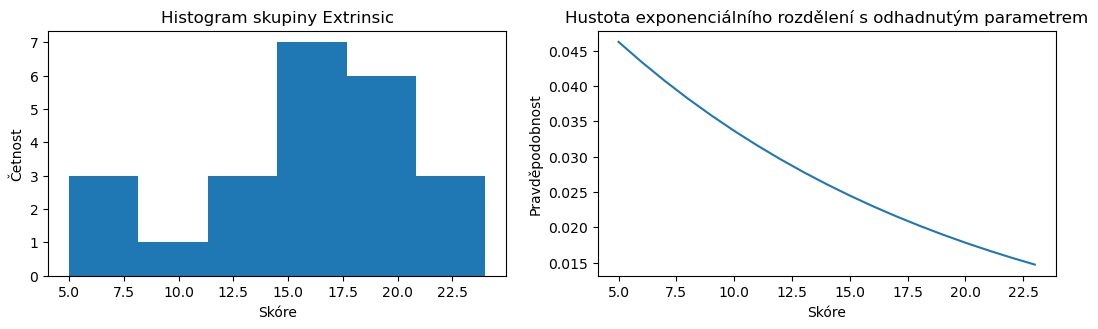

In [24]:
graf_hustoty(group1, "Intrinsic")
graf_hustoty(group2, "Extrinsic")

#### Rovnoměrné rozdělení

* Z přednášky vím, že maximálně věrohodného odhadu odhaduje parametry rovnoměrného rozdělení minimem a maximem.

In [25]:
def MLE_rovnomerne(column):
    return (min(column), max(column))

* Výsledky:

In [26]:
print("MLE parametr Unif Intrinsic:", MLE_rovnomerne(group1))
print("MLE parametr Unif Extrinsic:", MLE_rovnomerne(group2))

MLE parametr Unif Intrinsic: (12.0, 29.700000762939453)
MLE parametr Unif Extrinsic: (5.0, 24.0)


In [27]:
def rovnomerne(x, rozsah):
    return 1 / (rozsah[1] - rozsah[0])

In [28]:
def graf_hustoty(column, name):
    fig = plt.figure(figsize=(13, 7))
    ax1 = plt.subplot(221)
    my_histogram(column, name)
    ax2 = plt.subplot(222)
    plt.plot([x for x in range(int(min(column)), int(max(column)))], [rovnomerne(x, MLE_rovnomerne(column)) for x in range(int(min(column)), int(max(column)))])   
    plt.xlabel("Skóre")
    plt.ylabel("Pravděpodobnost")
    plt.title("Hustota rovnoměrného rozdělení s odhadnutými parametry") 

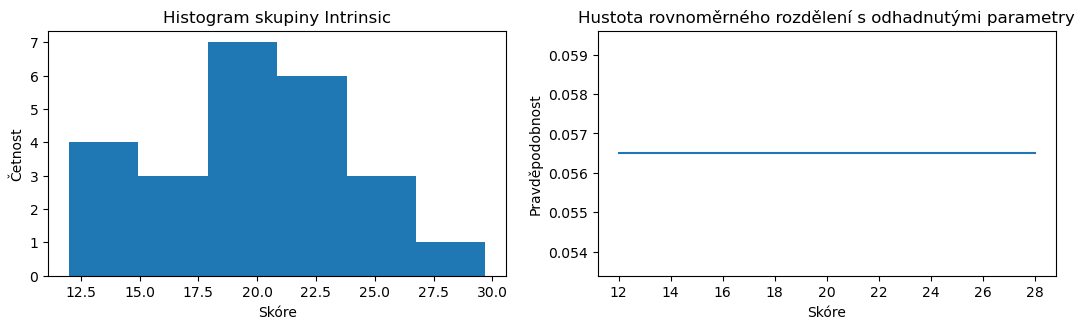

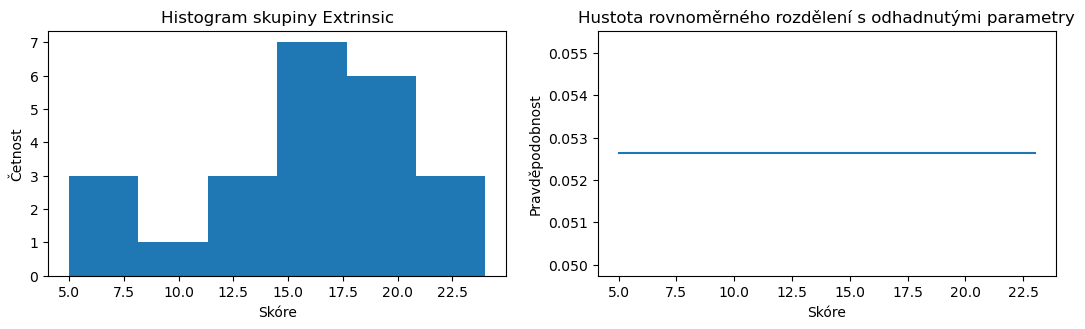

In [29]:
graf_hustoty(group1, "Intrinsic")
graf_hustoty(group2, "Extrinsic")

* Nejlépe ze všech rozdělení odpovídá rozdělení mých dat `normální` rozdělení.

# Úkol 4

* Histogram vygenerovaných dat velmi připomíná histogramy rozdělení obou skupin

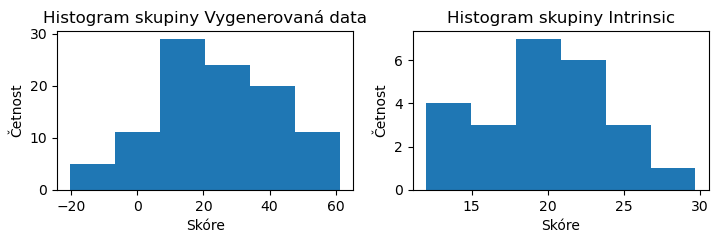

In [30]:
normalni_data = random.normal(loc=prumer(group1), scale=MLE_rozptyl(group1), size=(100))
fig = plt.figure(figsize=(13, 7))
ax1 = plt.subplot(331)
my_histogram(normalni_data, "Vygenerovaná data")
ax2 = plt.subplot(332)
my_histogram(group1, "Intrinsic")

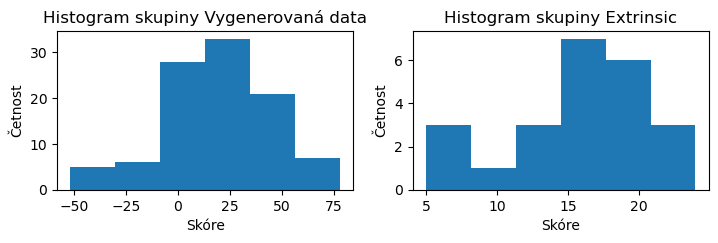

In [31]:
normalni_data = random.normal(loc=prumer(group2), scale=MLE_rozptyl(group2), size=(100))
fig = plt.figure(figsize=(13, 7))
ax1 = plt.subplot(331)
my_histogram(normalni_data, "Vygenerovaná data")
ax2 = plt.subplot(332)
my_histogram(group2, "Extrinsic")

# Úkol 5

#### Pro střední hodnoty na 95% konfidenčním intervalu platí:

In [41]:
def konfidencni_interval(column, t):
    return ( stredni_hodnota(column) - (t * math.sqrt(rozptyl(column)) / math.sqrt(column.count())), stredni_hodnota(column) + (t * math.sqrt(rozptyl(column)) / math.sqrt(column.count())) )

* Skupina Intrinsic

In [42]:
t1 = 2.069 # kritická hodnota studentova rozdělení (s 23 stupni volnosti, t0.975)
print("95% konfidenční interval pro střední hodnotu je:", konfidencni_interval(group1, t1))

95% konfidenční interval pro střední hodnotu je: (18.0083812130927, 21.758285676097973)


* Skupina Extrinsic

In [43]:
t2 = 2.074 # kritická hodnota studentova rozdělení (s 22 stupni volnosti, t0.975)
print("95% konfidenční interval pro střední hodnotu je:", konfidencni_interval(group2, t2))

95% konfidenční interval pro střední hodnotu je: (13.467598790004487, 18.010662494201735)


# Úkol 6

* Jelikož 4 nenáleží ani jednomu intervalu, který jsem v předchozím bodu spočítal, hypotézu, že střední hodnota je rovna 4 na hladině významnosti 5% pro obě skupiny zamítám.

In [44]:
print("Parametr K =", K)

Parametr K = 4


# Úkol 7

* Hypotézu, zda se rovnají střední hodnoty převedu na úlohu, zda se střední hodnota rovna 0 s 95% konfidenčním intervalem.

In [105]:
def diff_transformace(column1, column2):
    return [column1[i] - column2[i] for i in range(min(len(column1), len(column2)))]

In [106]:
# vytvořím nový dataset s hodnotami roz
tmp = diff_transformace(group1, group2)
new = group2.copy()
for i in range(len(tmp)):
    new[i] = tmp[i]

* 0 nenáleží konfidenčnímu intervalu, proto zamítám hypotézu, že 0 je střední hodnota rozdílu dvou skupin, proto na hladině významnosti 5% nemají tyto 2 skupiny stejnou střední hodnotu

In [108]:
t = 2.074
konfidencni_interval(new, t)

(3.0803858062950846, 4.354396553615963)